In [11]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.offsetbox import AnchoredText
from helpers_plot import initPlot, finalizePlot
initPlot(titlesize=20)

from cov_constantPowerspectrum import cov_constantPowerspectrum
from cov_constantPowerspectrum_finiteField import cov_constantPowerspectrum_finiteField

In [12]:
# Calculation for fixed a
a= 8.93 # Sidelength in deg

sigma=0.31
neff=4096*4096/10/10

thetas_ind=np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                        [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8], 
                        [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8], 
                        [4, 4, 16], [4, 8, 8], [4, 8, 16], [4, 16, 16], 
                        [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16] ])


N=len(thetas_ind)

Term1=np.zeros((N, N))
Term2=np.zeros((N, N))
Joachimi=np.zeros((N, N))

covarianceCalculator = cov_constantPowerspectrum(sigma, neff, a*a, unit='deg')
covarianceCalculatorFiniteField =cov_constantPowerspectrum_finiteField(sigma, neff, a*a, unit='deg')
for i, thetas1 in enumerate(thetas_ind):
    for j, thetas2 in enumerate(thetas_ind):
        Term1[i,j]=covarianceCalculatorFiniteField.term1_total(thetas=np.array([thetas1[0],thetas1[1], thetas1[2], thetas2[0],thetas2[1], thetas2[2]]), unit="arcmin")
        Term2[i,j]=covarianceCalculatorFiniteField.term2_total(thetas=np.array([thetas1[0],thetas1[1], thetas1[2], thetas2[0],thetas2[1], thetas2[2]]), unit="arcmin")
        Joachimi[i,j]=covarianceCalculator.covariance(thetas=np.array([thetas1[0],thetas1[1], thetas1[2], thetas2[0],thetas2[1], thetas2[2]]), unit="arcmin")



In [13]:
# Load comparison data
map3_data=np.load("map_cubed_from_gamma_npix_4096_fieldsize_10.npy")
Nlos=8192
map3_data=map3_data.reshape((5*5*5, Nlos))
map3_data=map3_data[[31,32,33,34,37,38,39,43,44,49,62, 63, 64, 68, 69, 74, 93, 94, 99,124]]

map3_data_half=map3_data[:,:Nlos//2]
cov=np.cov(map3_data)
cov_half=np.cov(map3_data_half)


<Figure size 432x288 with 0 Axes>

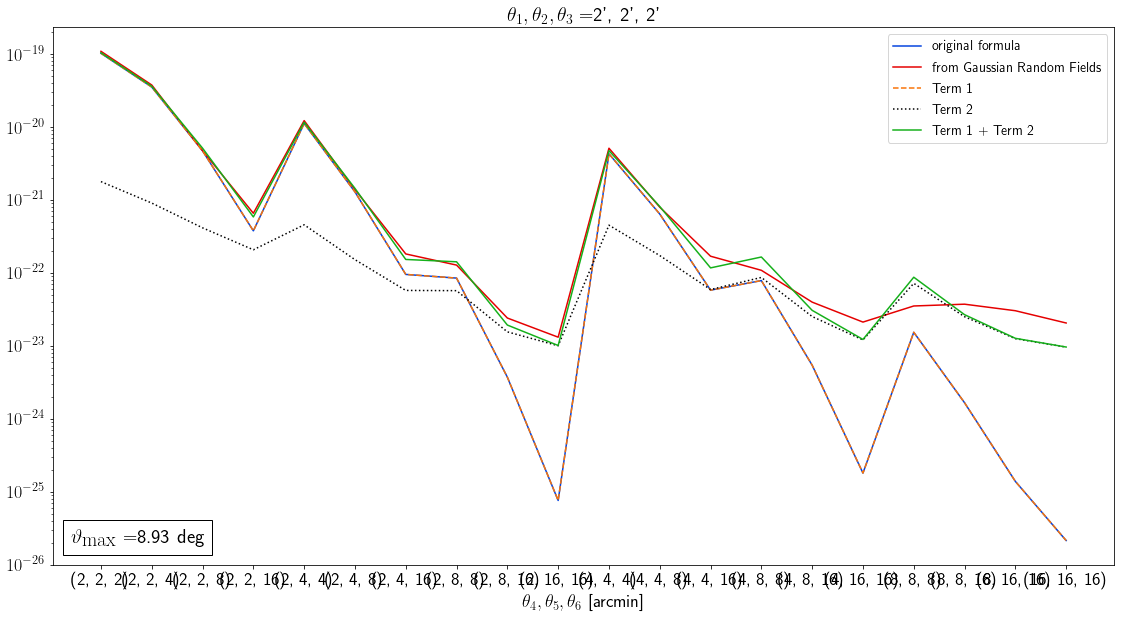

<Figure size 432x288 with 0 Axes>

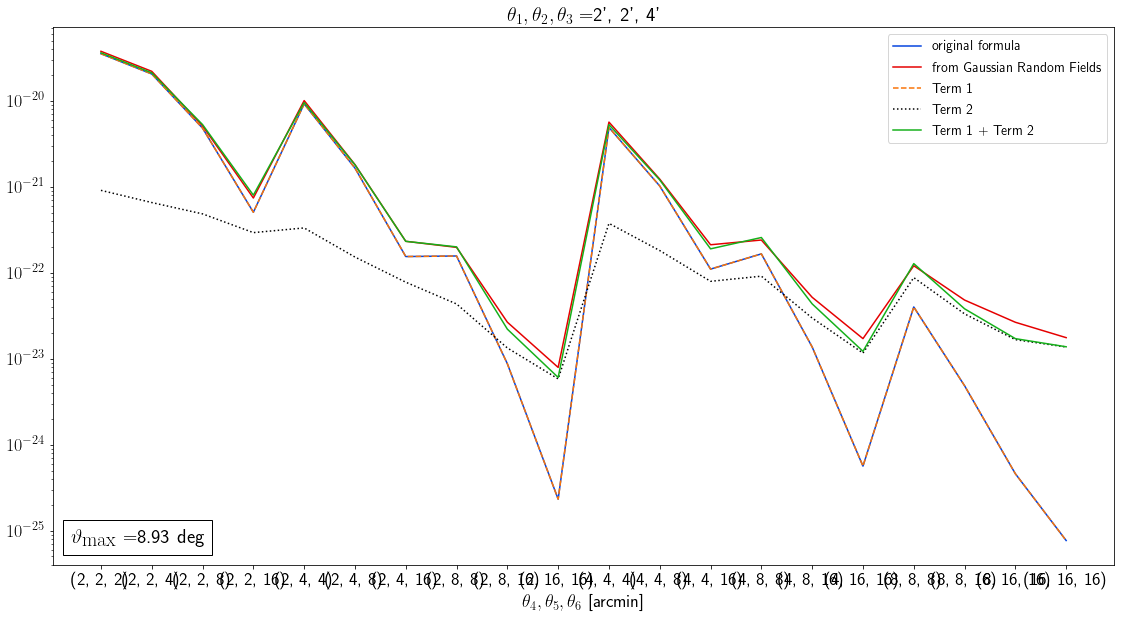

<Figure size 432x288 with 0 Axes>

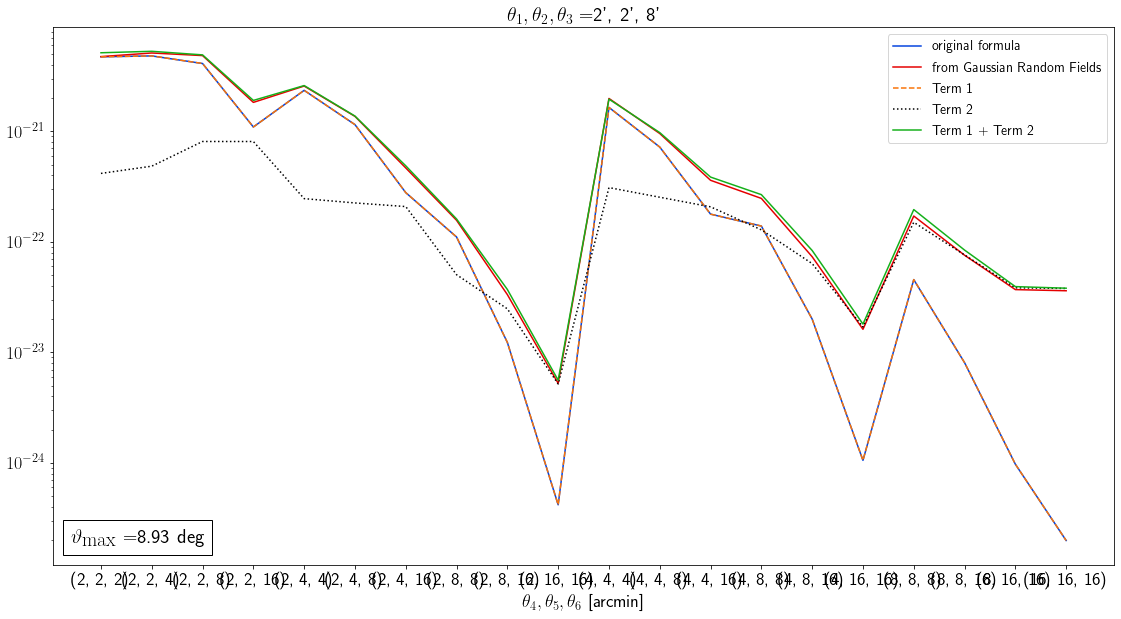

<Figure size 432x288 with 0 Axes>

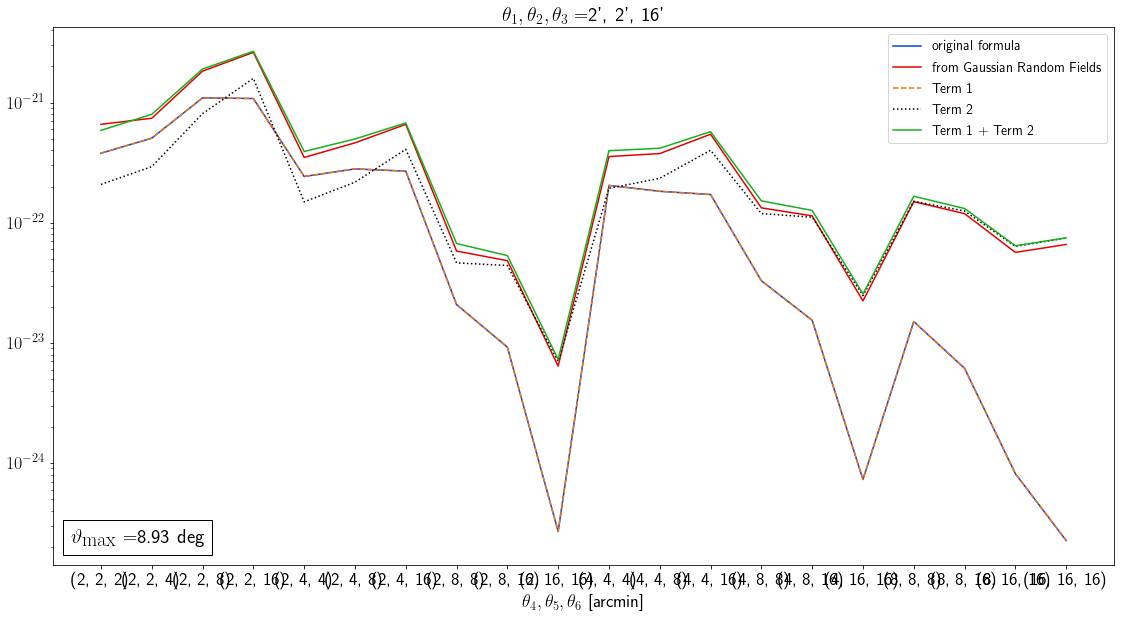

<Figure size 432x288 with 0 Axes>

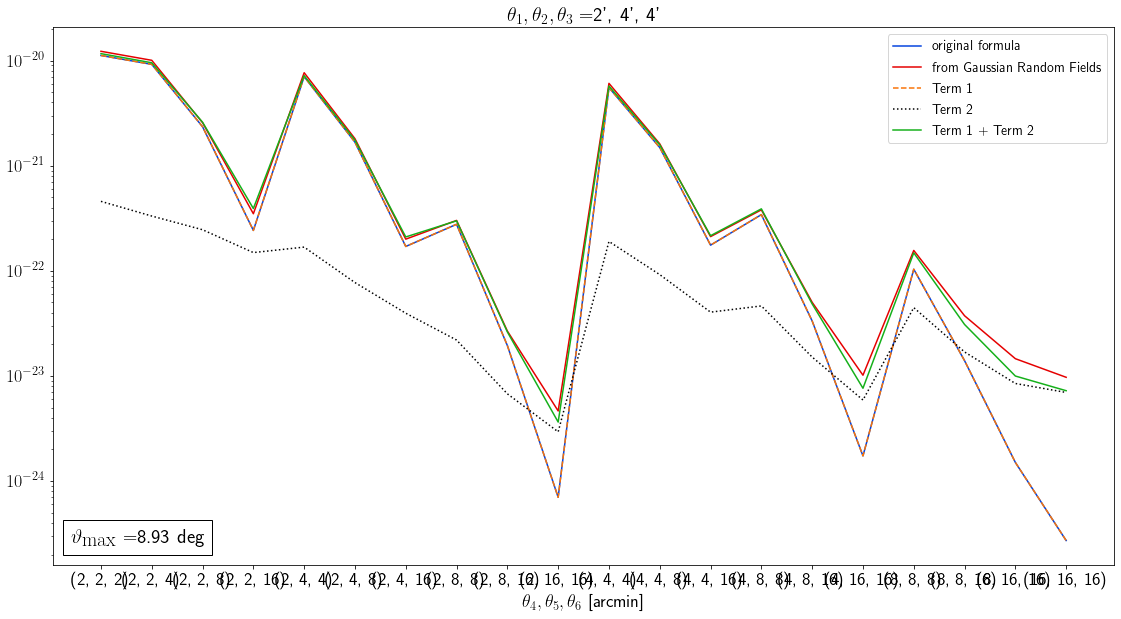

<Figure size 432x288 with 0 Axes>

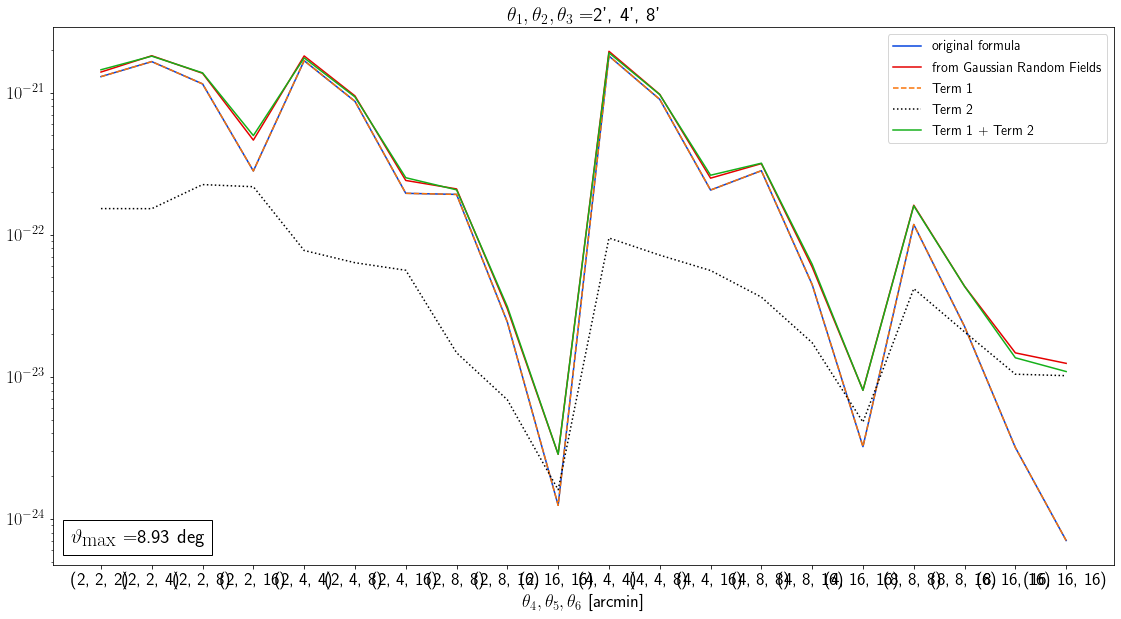

<Figure size 432x288 with 0 Axes>

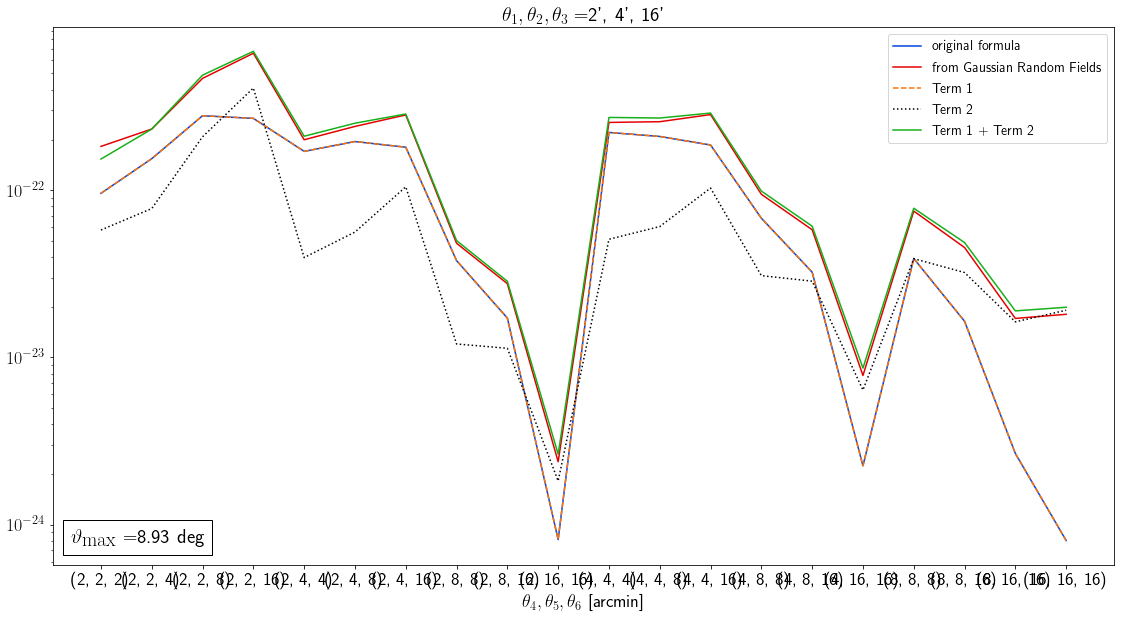

<Figure size 432x288 with 0 Axes>

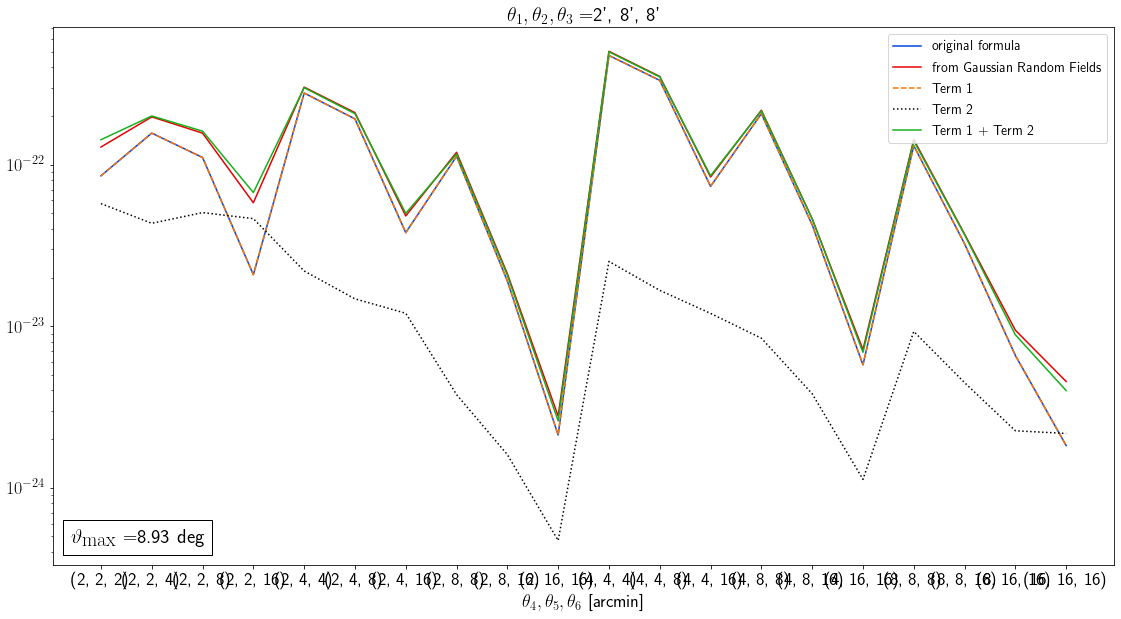

<Figure size 432x288 with 0 Axes>

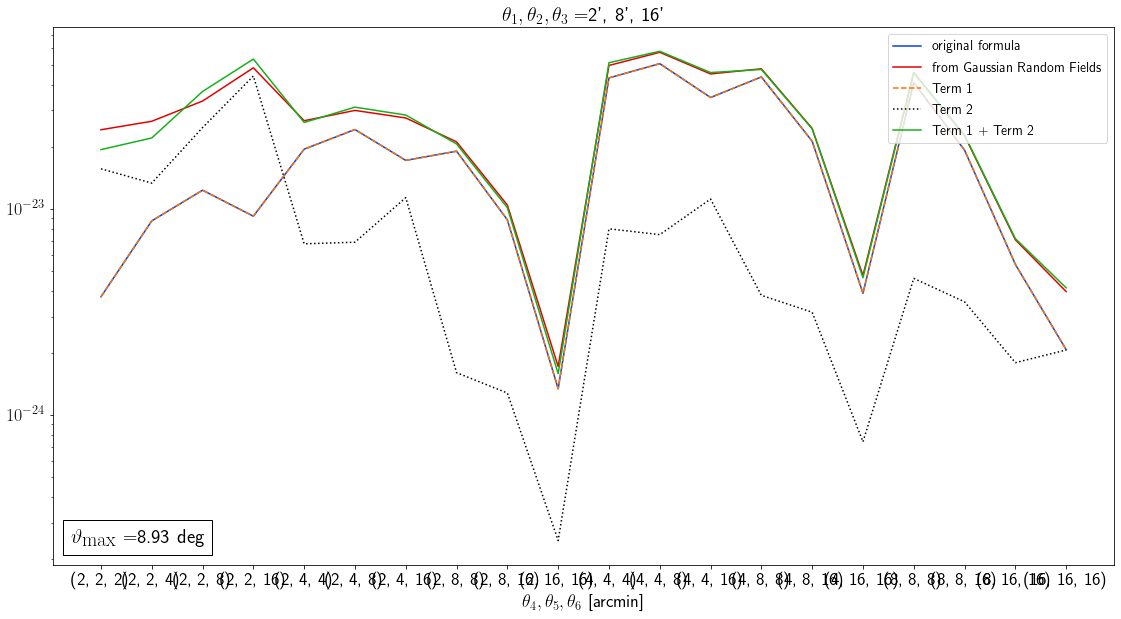

<Figure size 432x288 with 0 Axes>

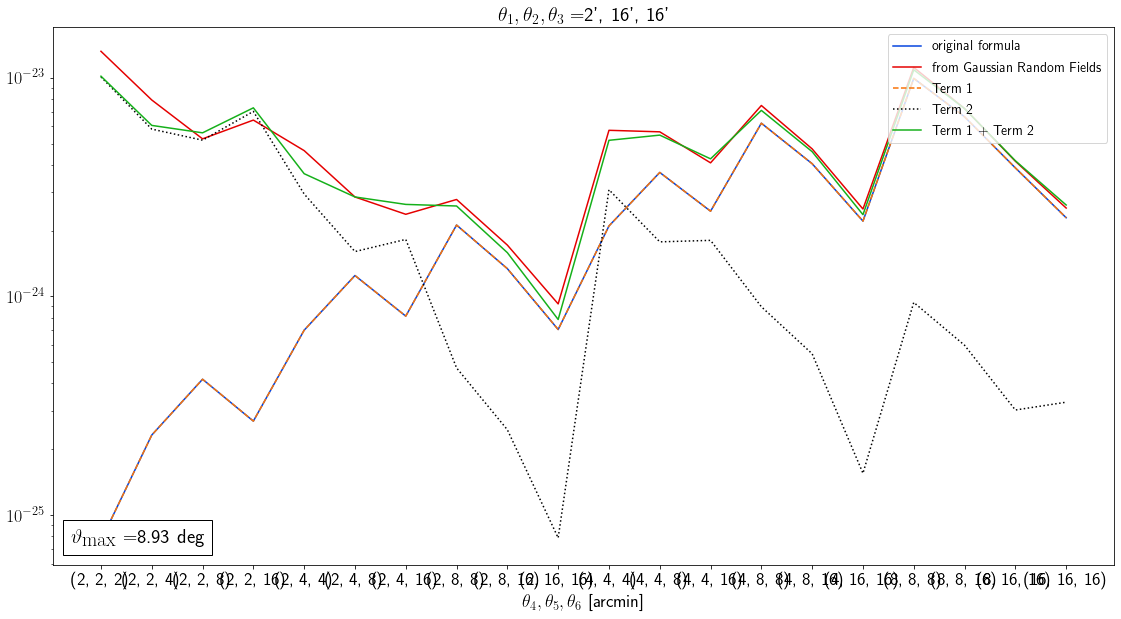

<Figure size 432x288 with 0 Axes>

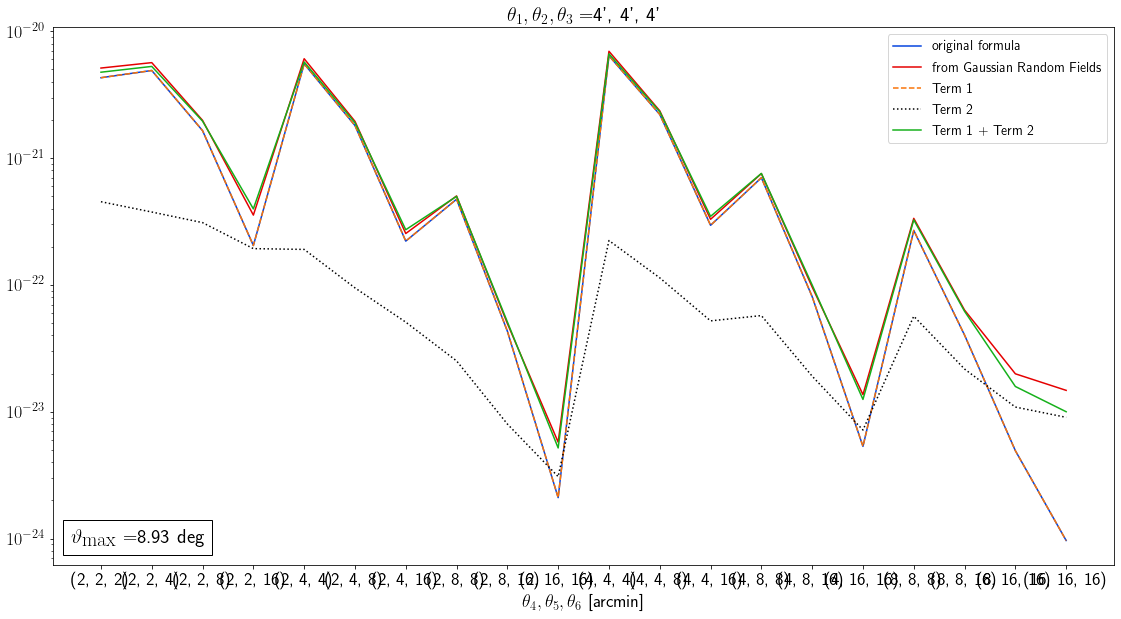

<Figure size 432x288 with 0 Axes>

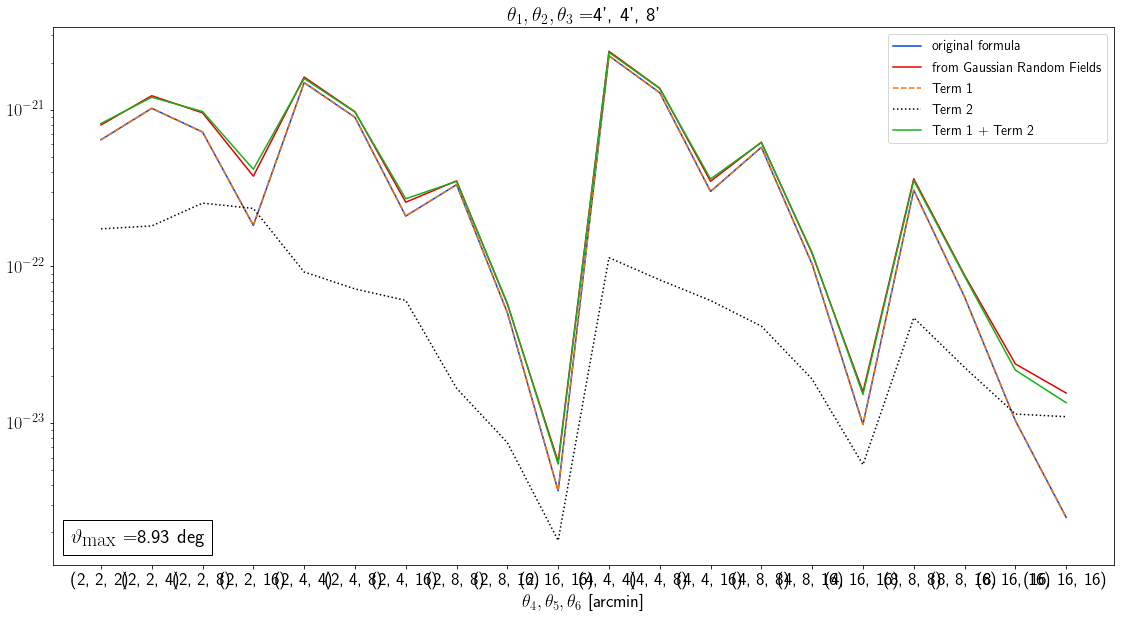

<Figure size 432x288 with 0 Axes>

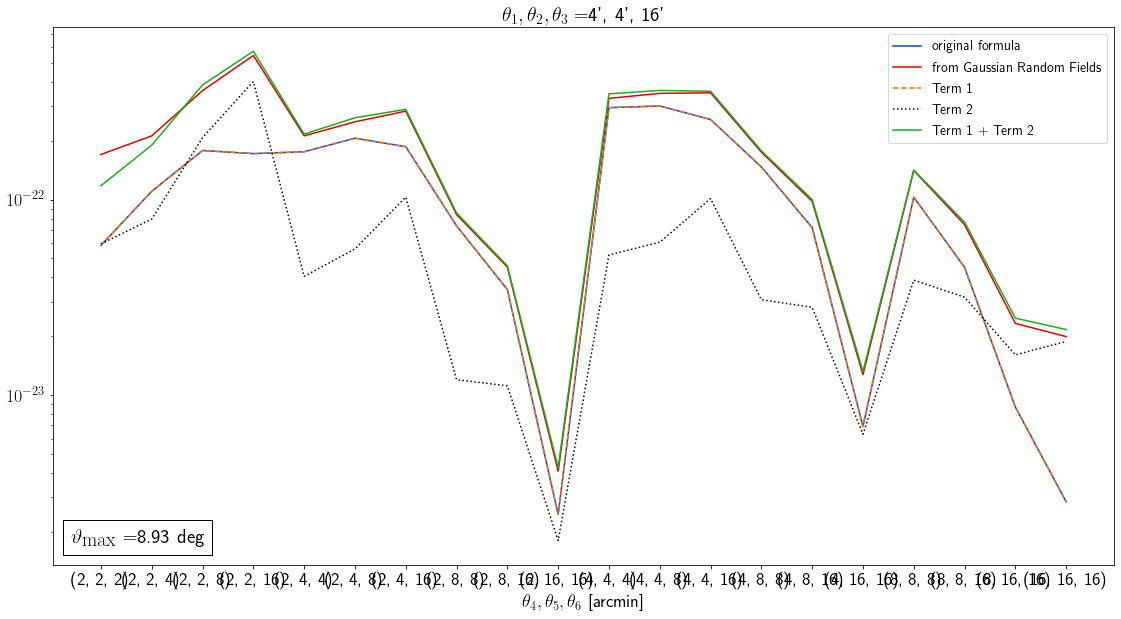

<Figure size 432x288 with 0 Axes>

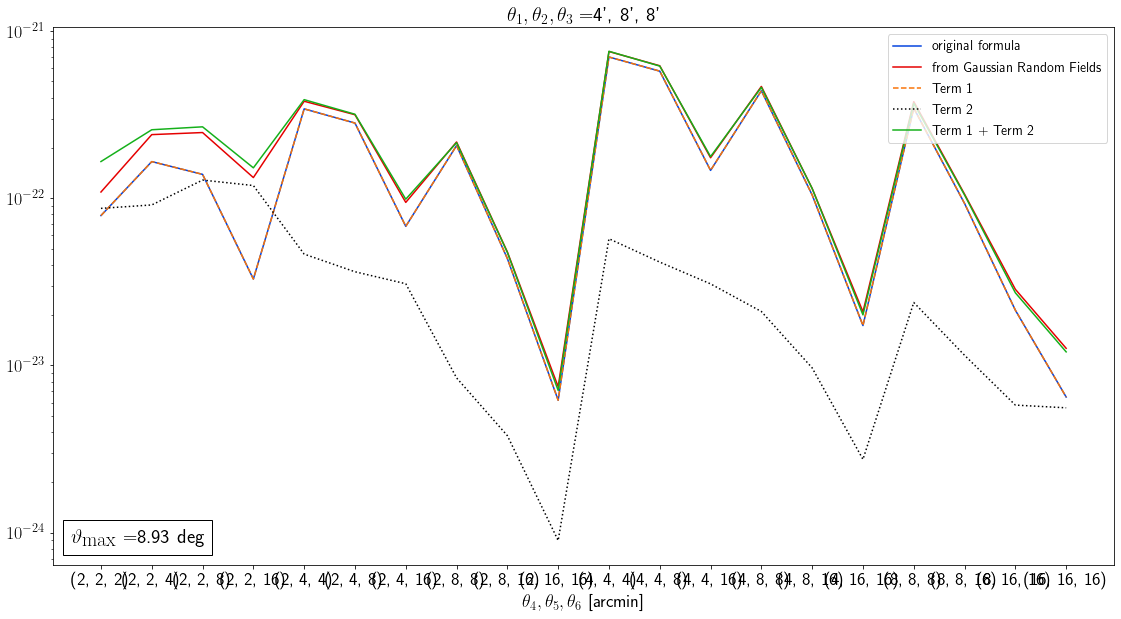

<Figure size 432x288 with 0 Axes>

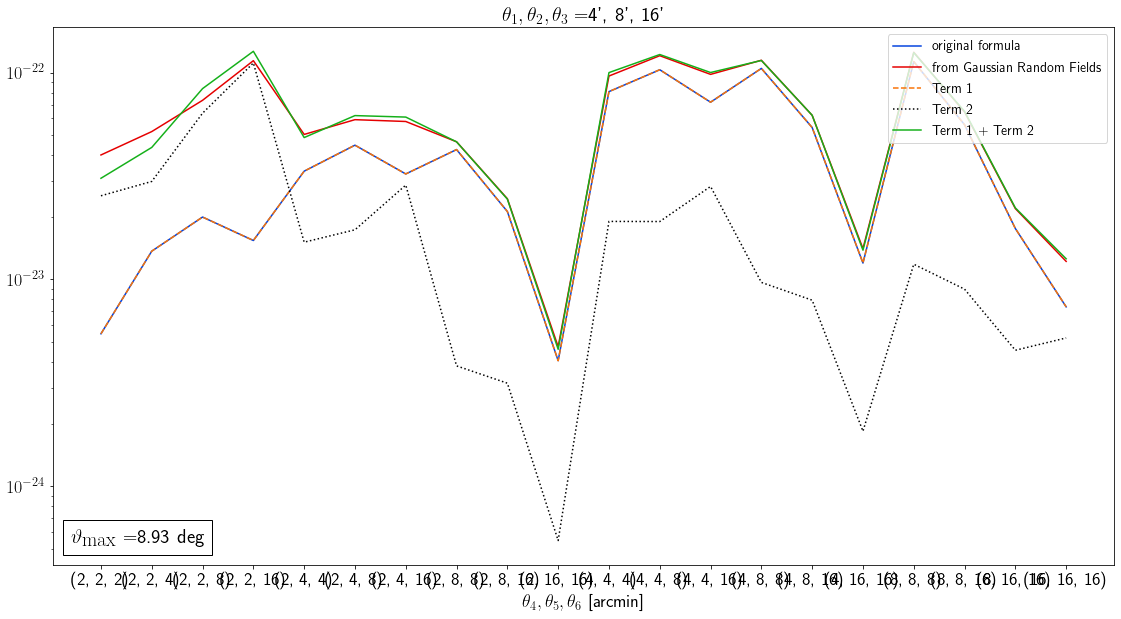

<Figure size 432x288 with 0 Axes>

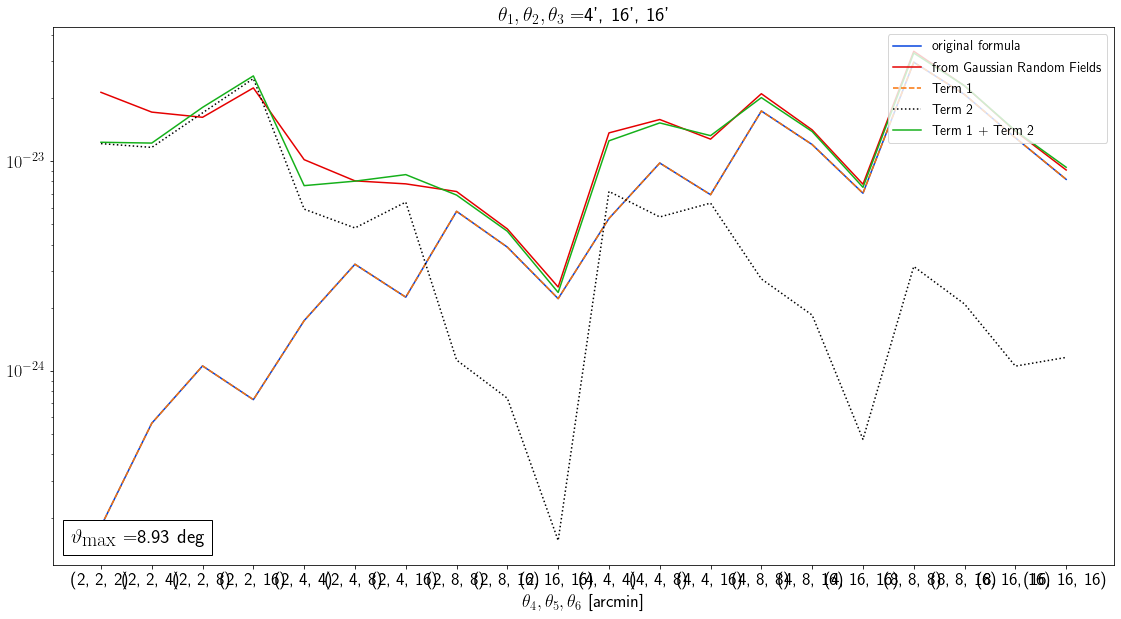

<Figure size 432x288 with 0 Axes>

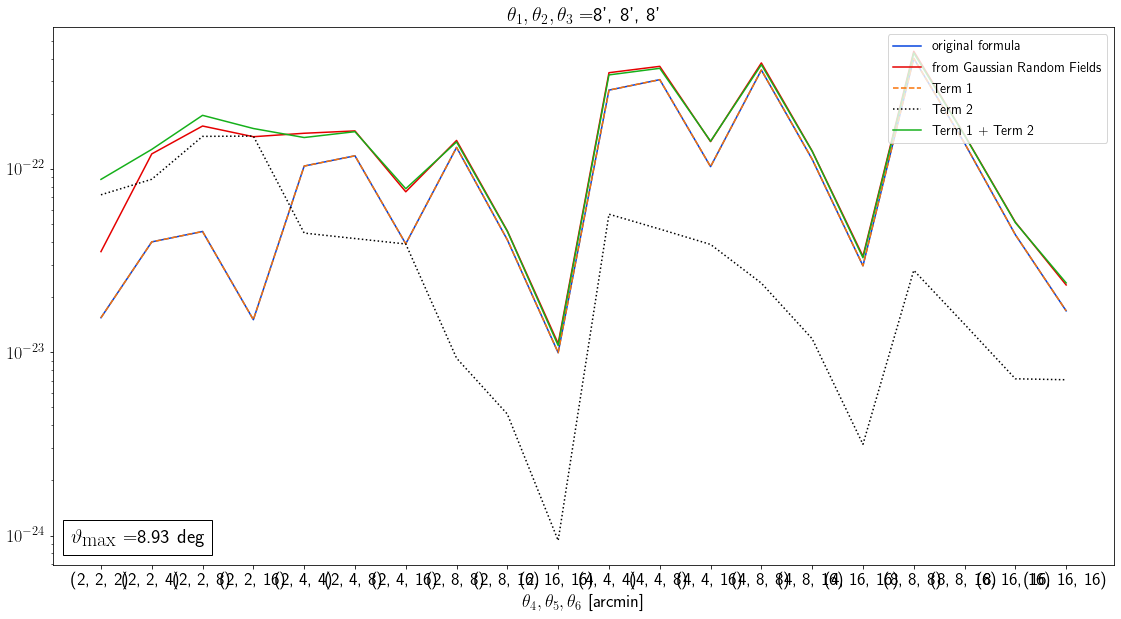

<Figure size 432x288 with 0 Axes>

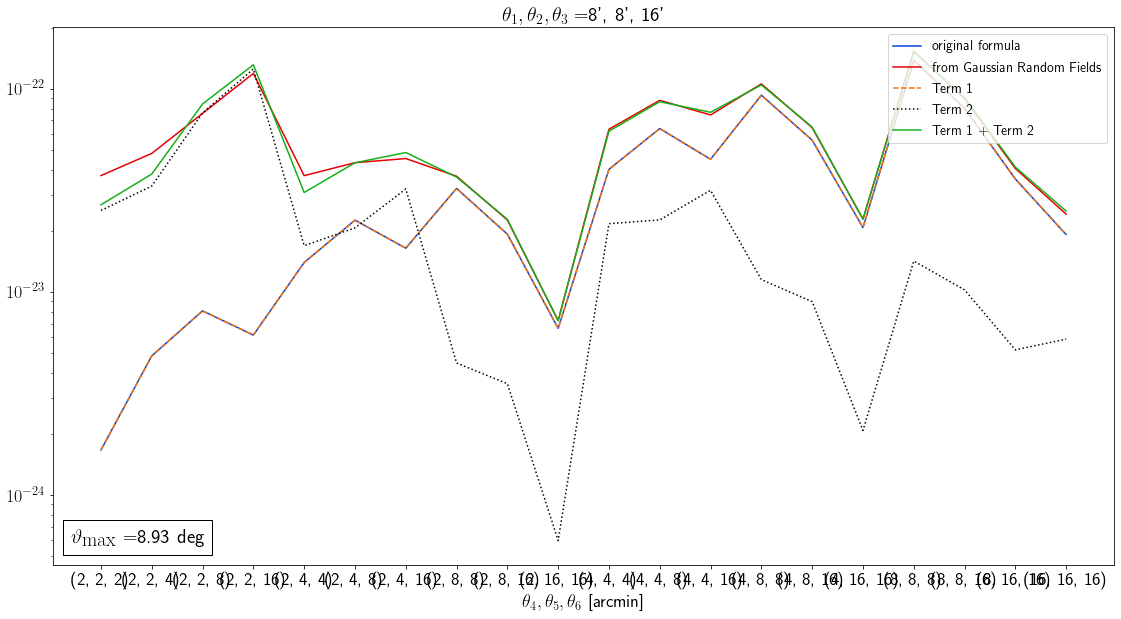

<Figure size 432x288 with 0 Axes>

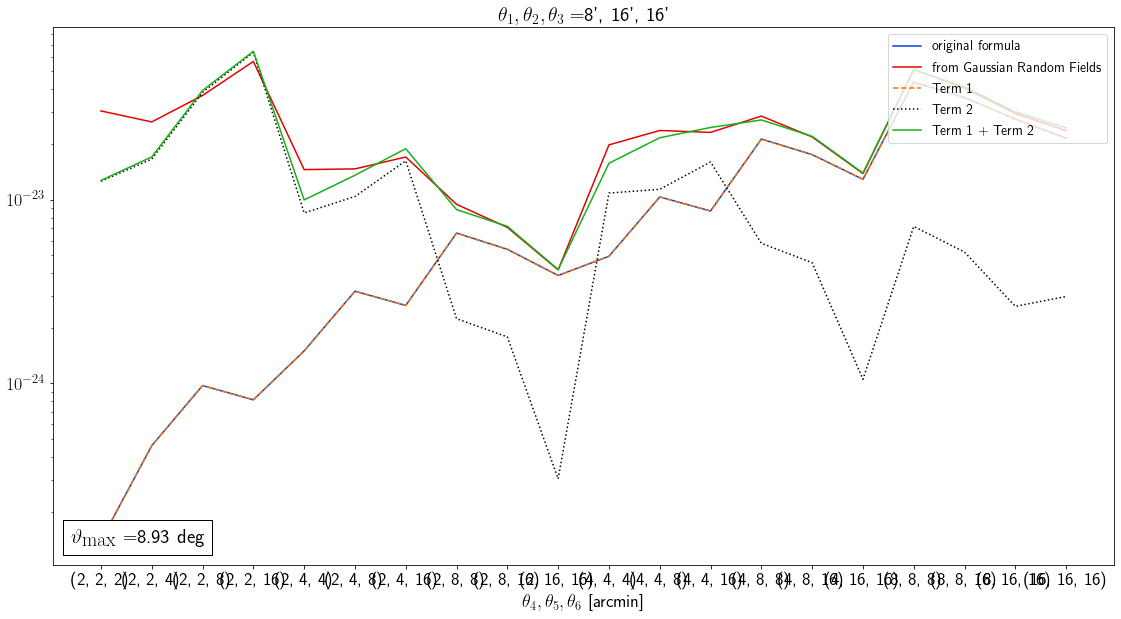

<Figure size 432x288 with 0 Axes>

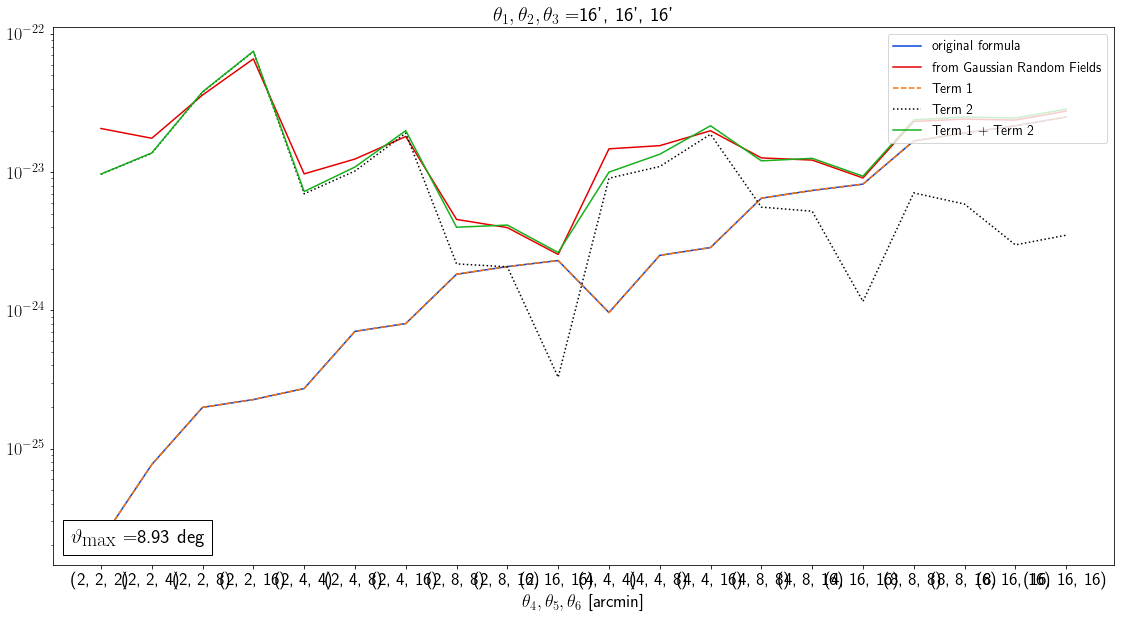

In [14]:
# Plot for fixed a
thetas_labels=[]
for thetas in thetas_ind:
    thetas_labels.append(f"({thetas[0]}, {thetas[1]}, {thetas[2]})")


thetas_ticks=np.arange(0, N)
for i, thetas1 in enumerate(thetas_ind):
    plt.clf()
    fig, ax=plt.subplots(figsize=(21,12))
    ax.set_yscale('log')
    ax.set_xlabel(r'$\theta_4, \theta_5, \theta_6$ [arcmin]')
    ax.set_xticks(thetas_ticks)
    ax.set_xticklabels(thetas_labels)


    ax.plot(Joachimi[i], ls='-', color='xkcd:blue', label='original formula')
    ax.plot(cov[i], color='xkcd:red', label='from Gaussian Random Fields')
    ax.plot(Joachimi[i], ls='--',color='xkcd:orange', label="Term 1")
    ax.plot(Term2[i], ls=':', color='k', label='Term 2')
    ax.plot((Joachimi[i]+Term2[i]), ls='-', color='xkcd:green',  label='Term 1 + Term 2')
    at=AnchoredText(r"$\vartheta_\textrm{max}=$"+f"{a:.2f} deg", loc='lower left')
    ax.add_artist(at)
    
    finalizePlot(ax, title=r'$\theta_1, \theta_2, \theta_3=$'+f"{thetas1[0]}', {thetas1[1]}', {thetas1[2]}'", outputFn=f"cov_{thetas1[0]}_{thetas1[1]}_{thetas1[2]}_a_{a:.1f}.png", loc_legend='upper right')

<Figure size 432x288 with 0 Axes>

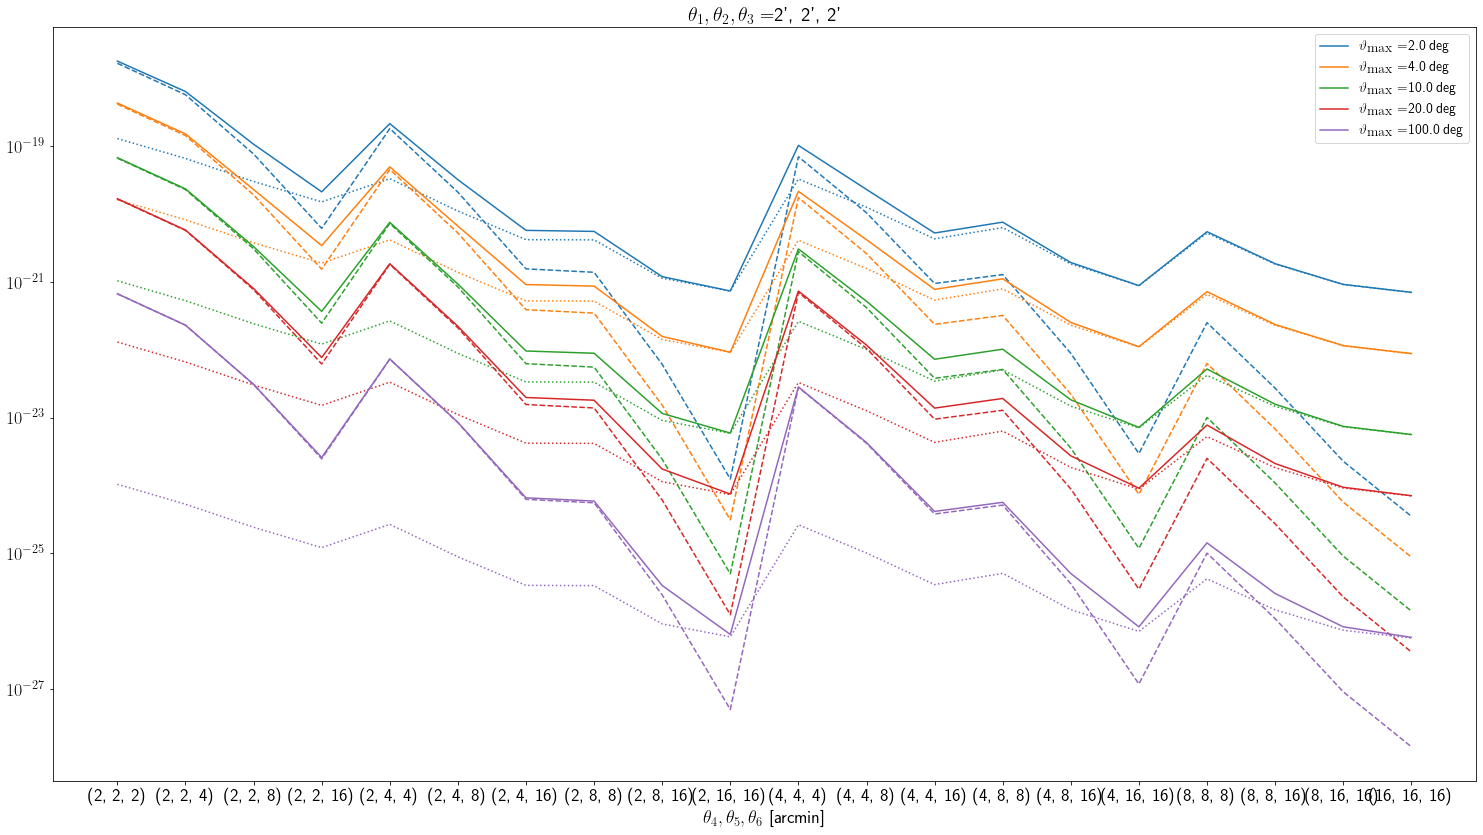

<Figure size 432x288 with 0 Axes>

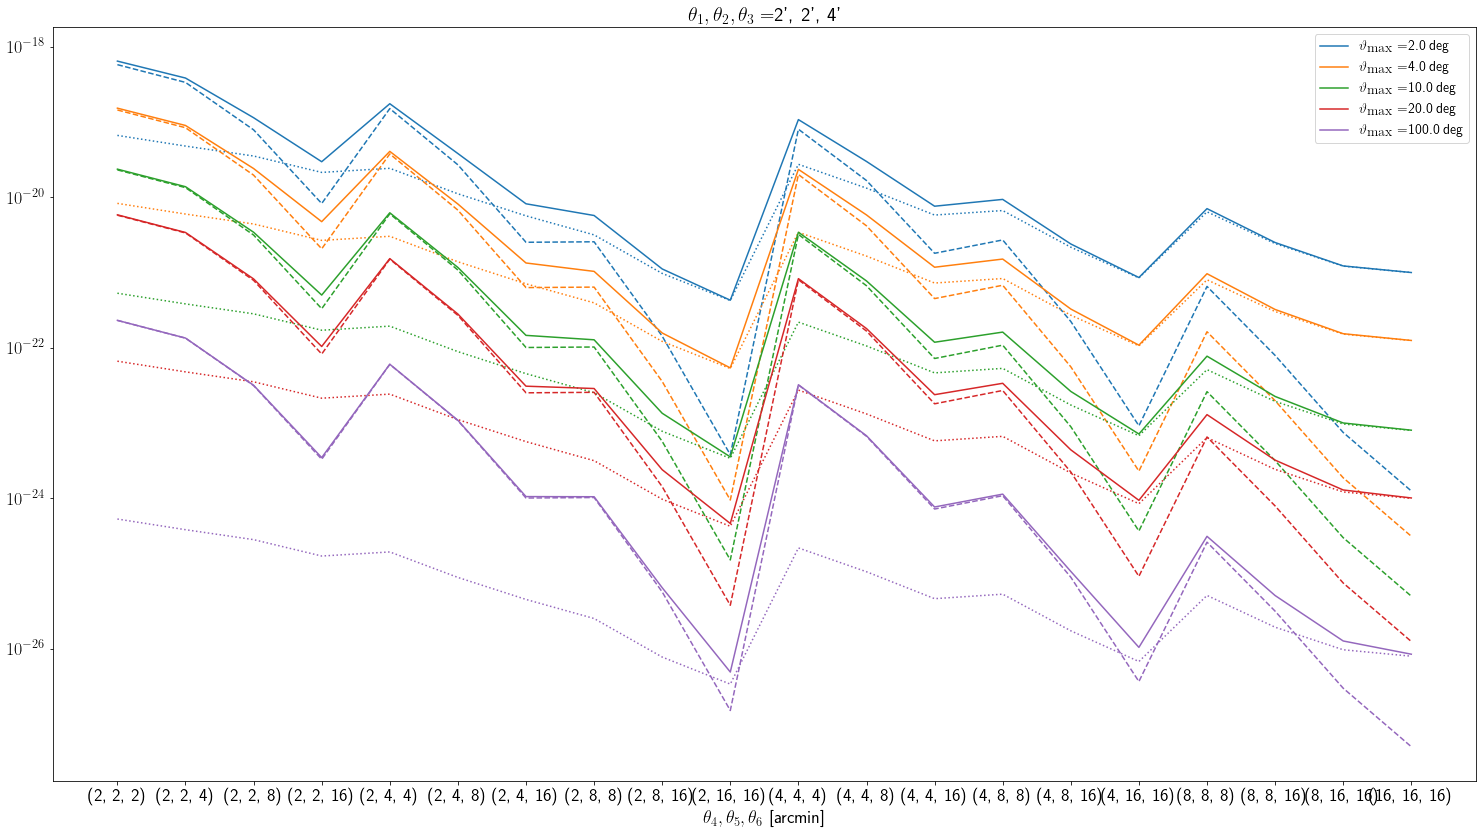

<Figure size 432x288 with 0 Axes>

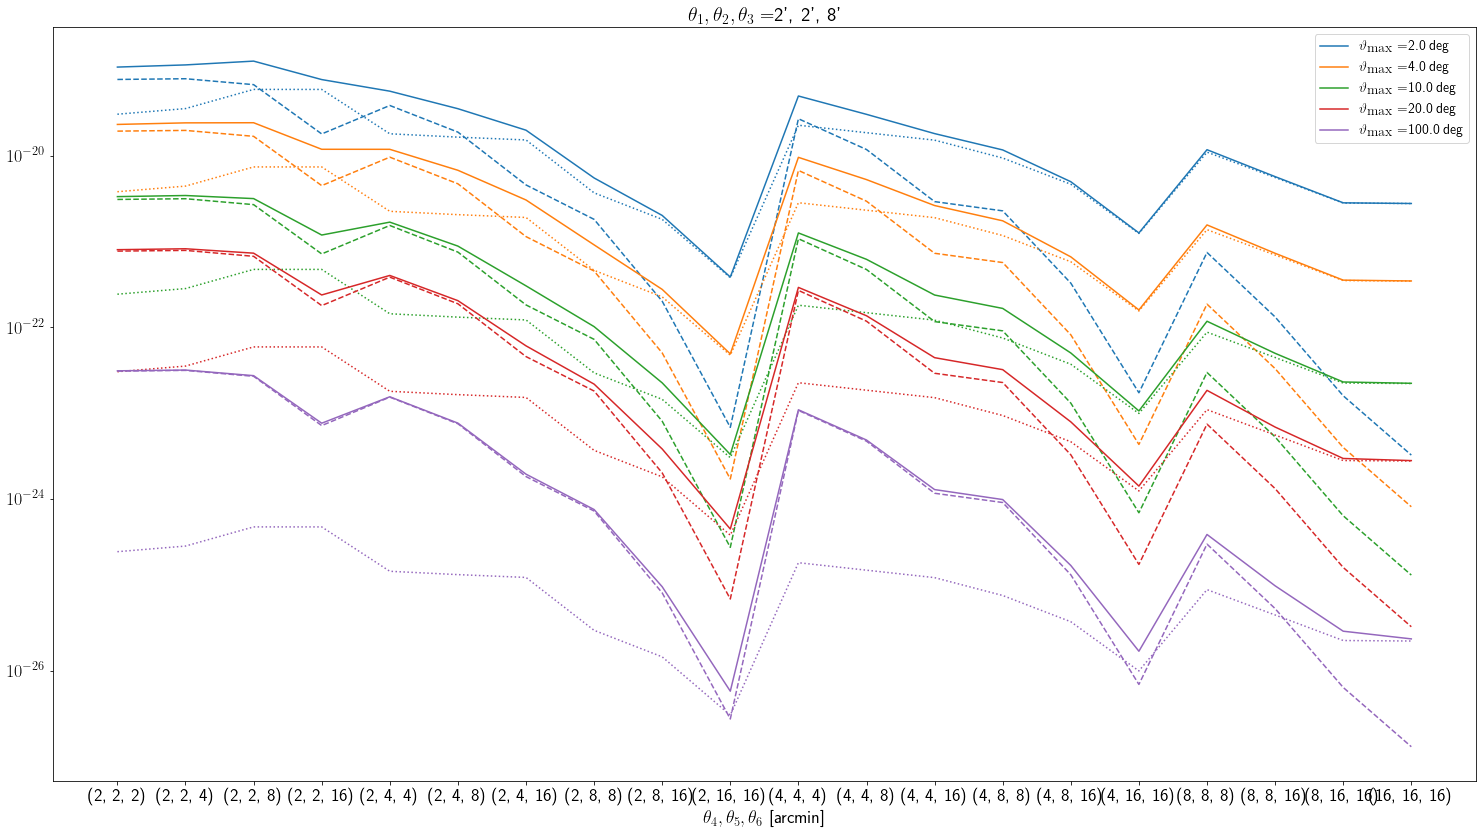

<Figure size 432x288 with 0 Axes>

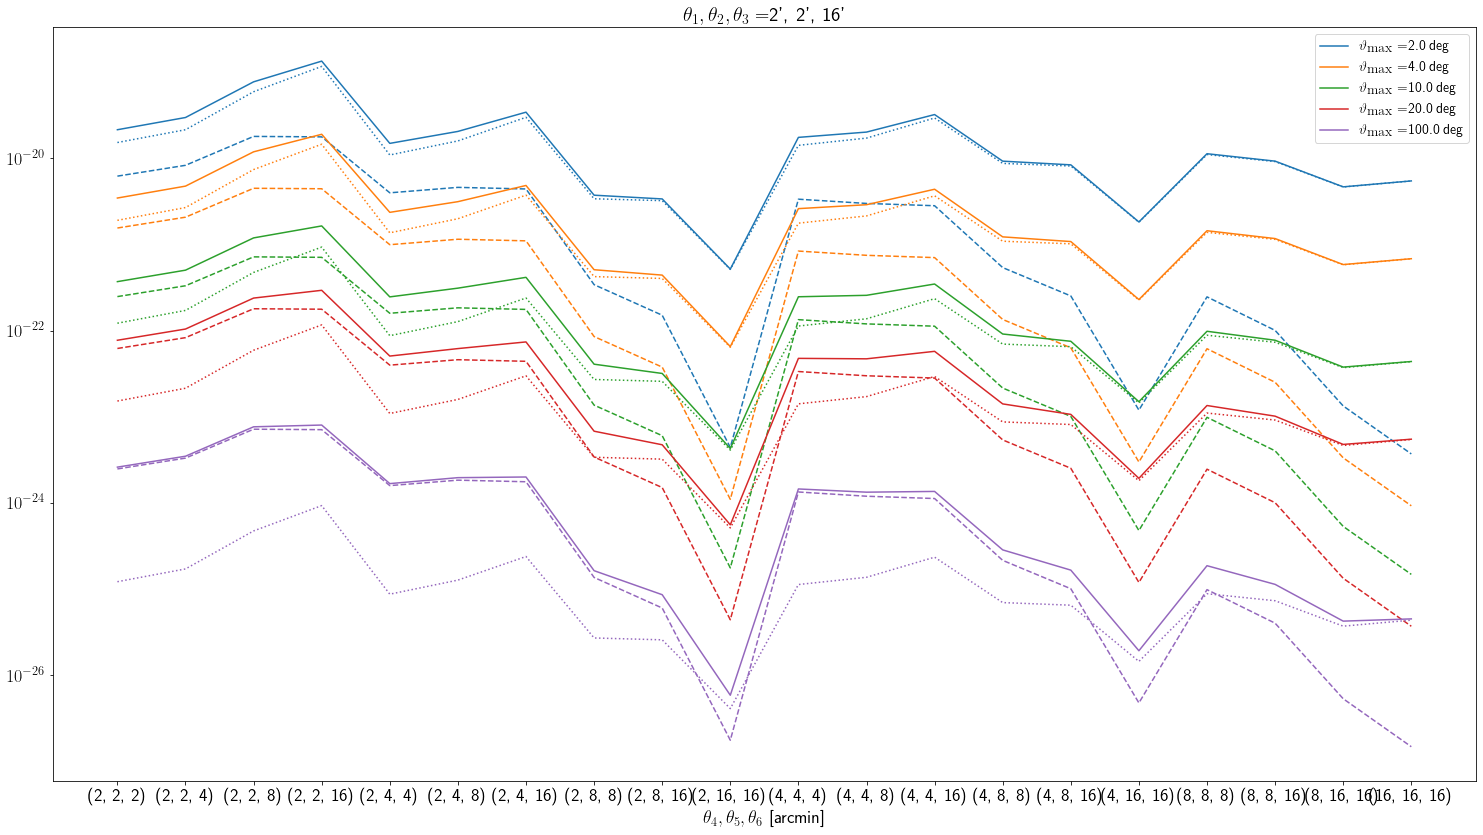

<Figure size 432x288 with 0 Axes>

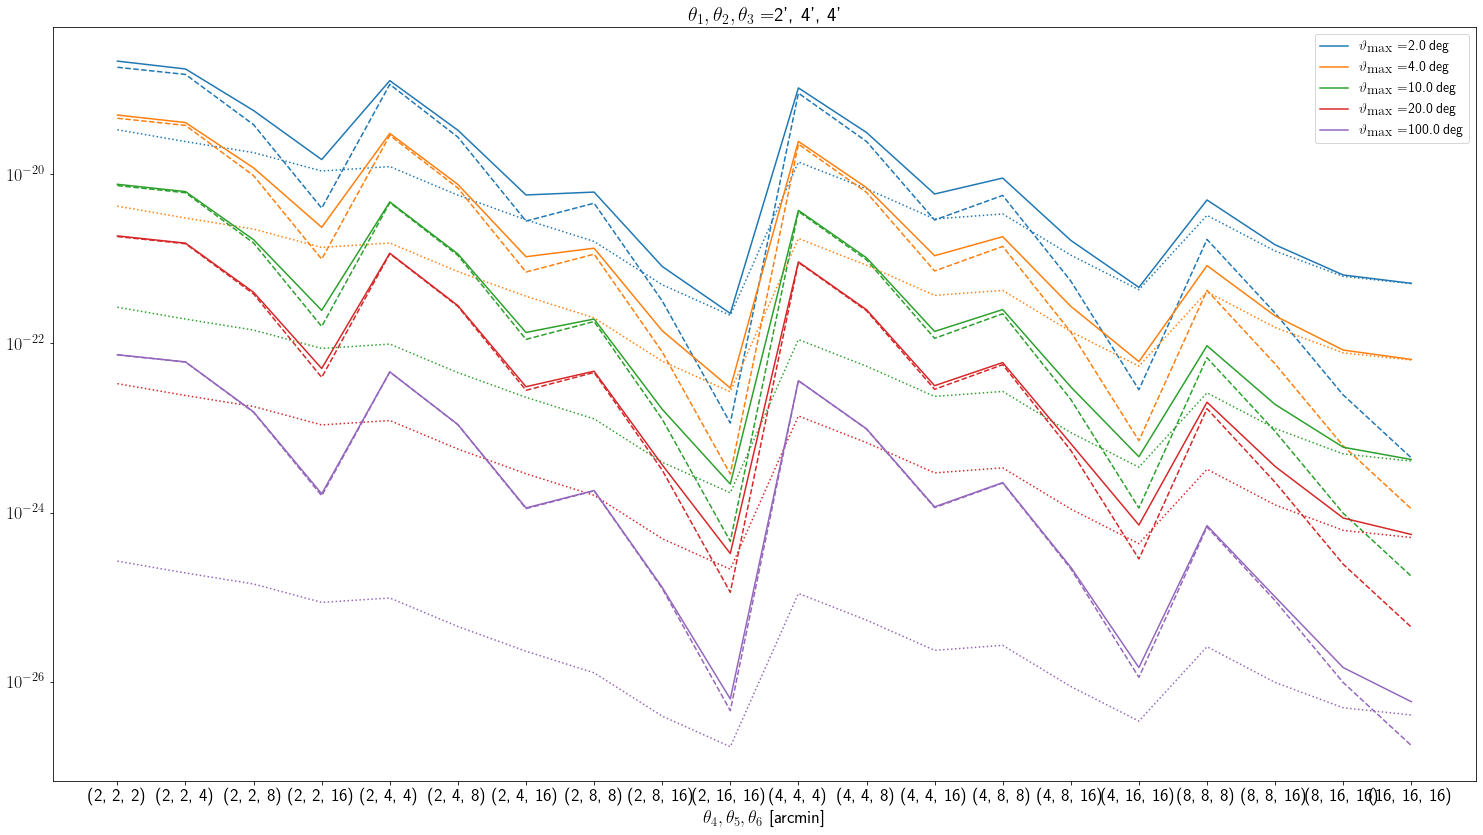

<Figure size 432x288 with 0 Axes>

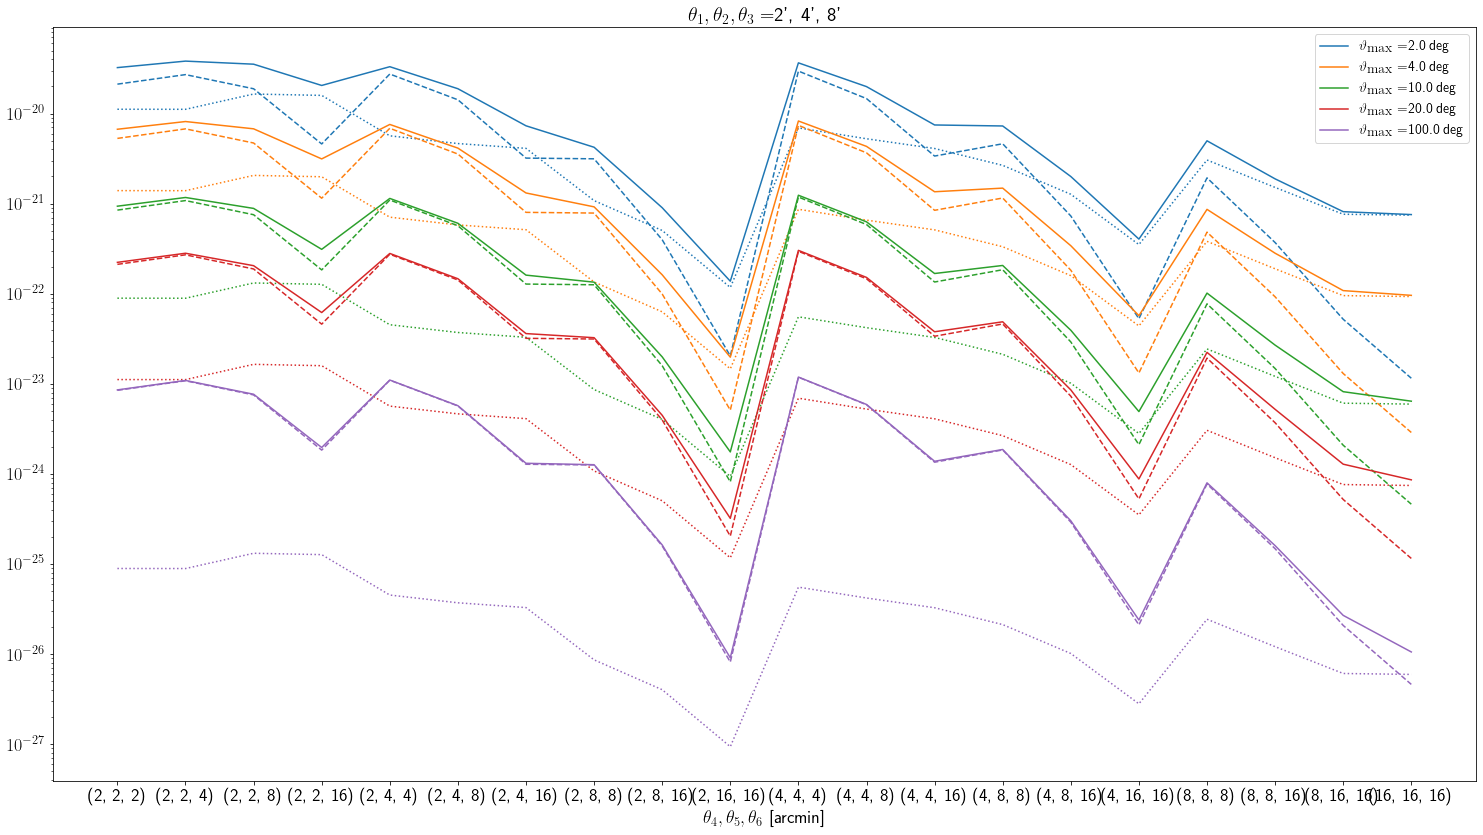

<Figure size 432x288 with 0 Axes>

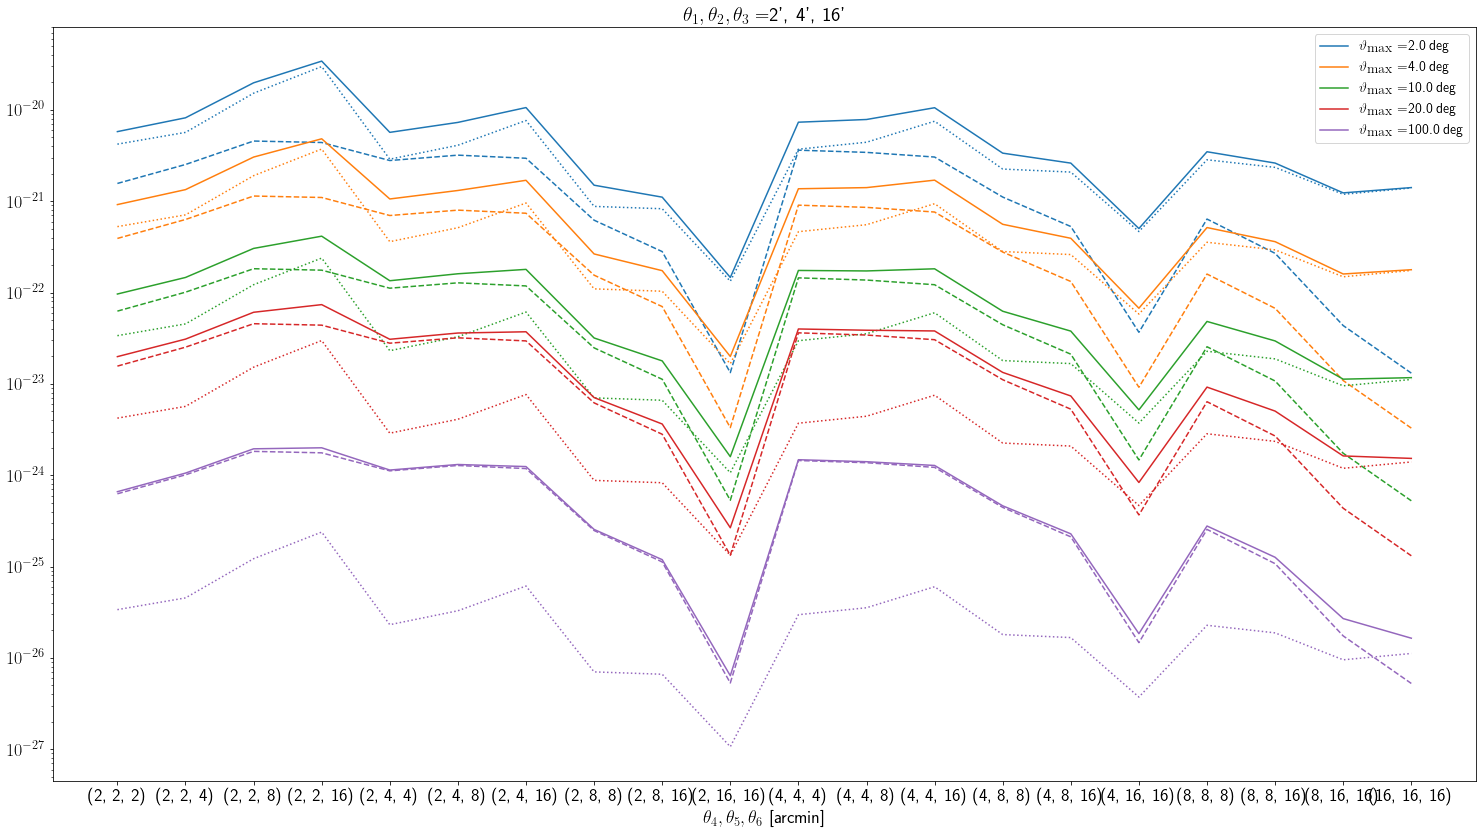

<Figure size 432x288 with 0 Axes>

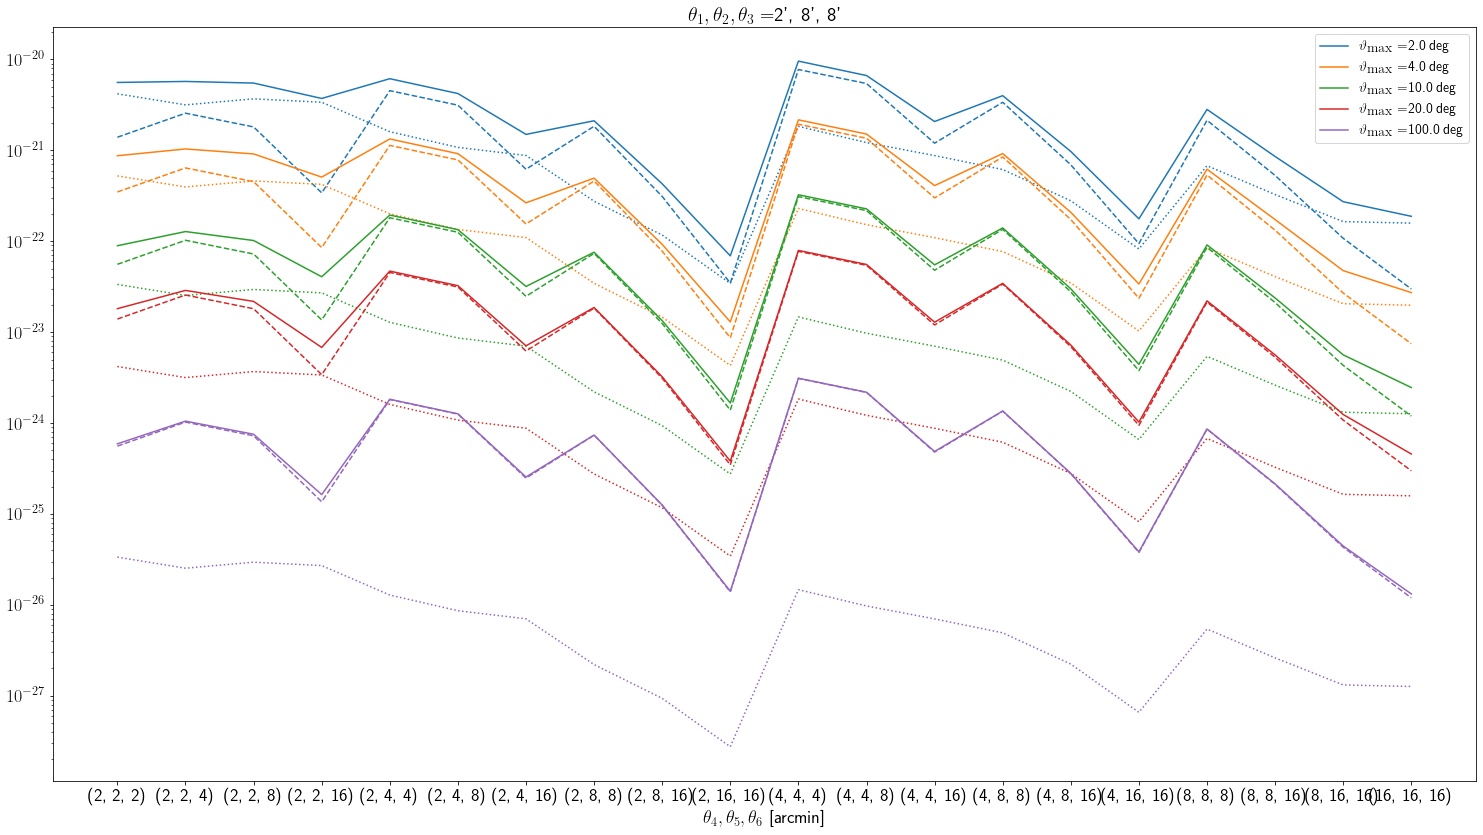

<Figure size 432x288 with 0 Axes>

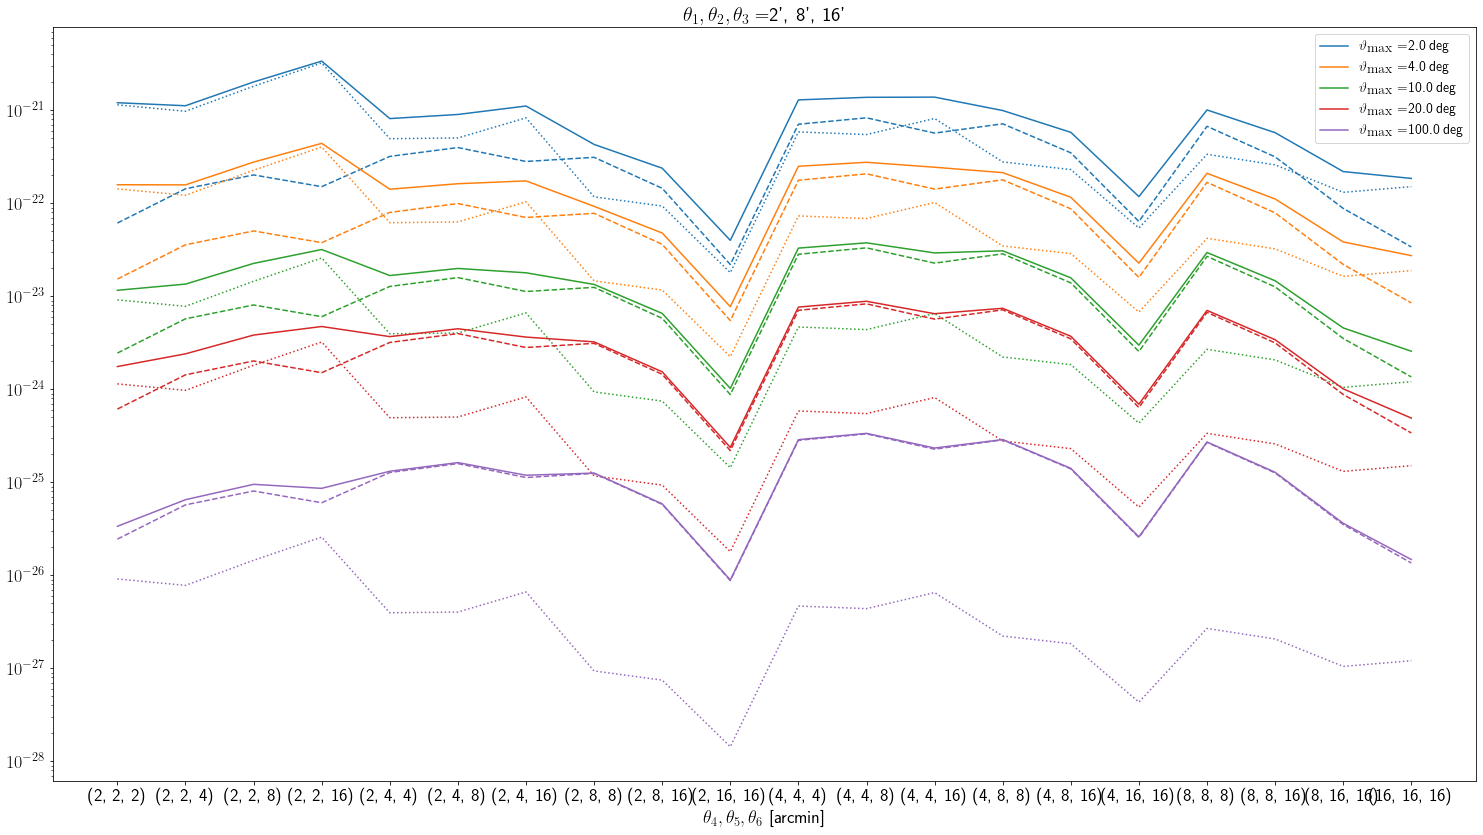

<Figure size 432x288 with 0 Axes>

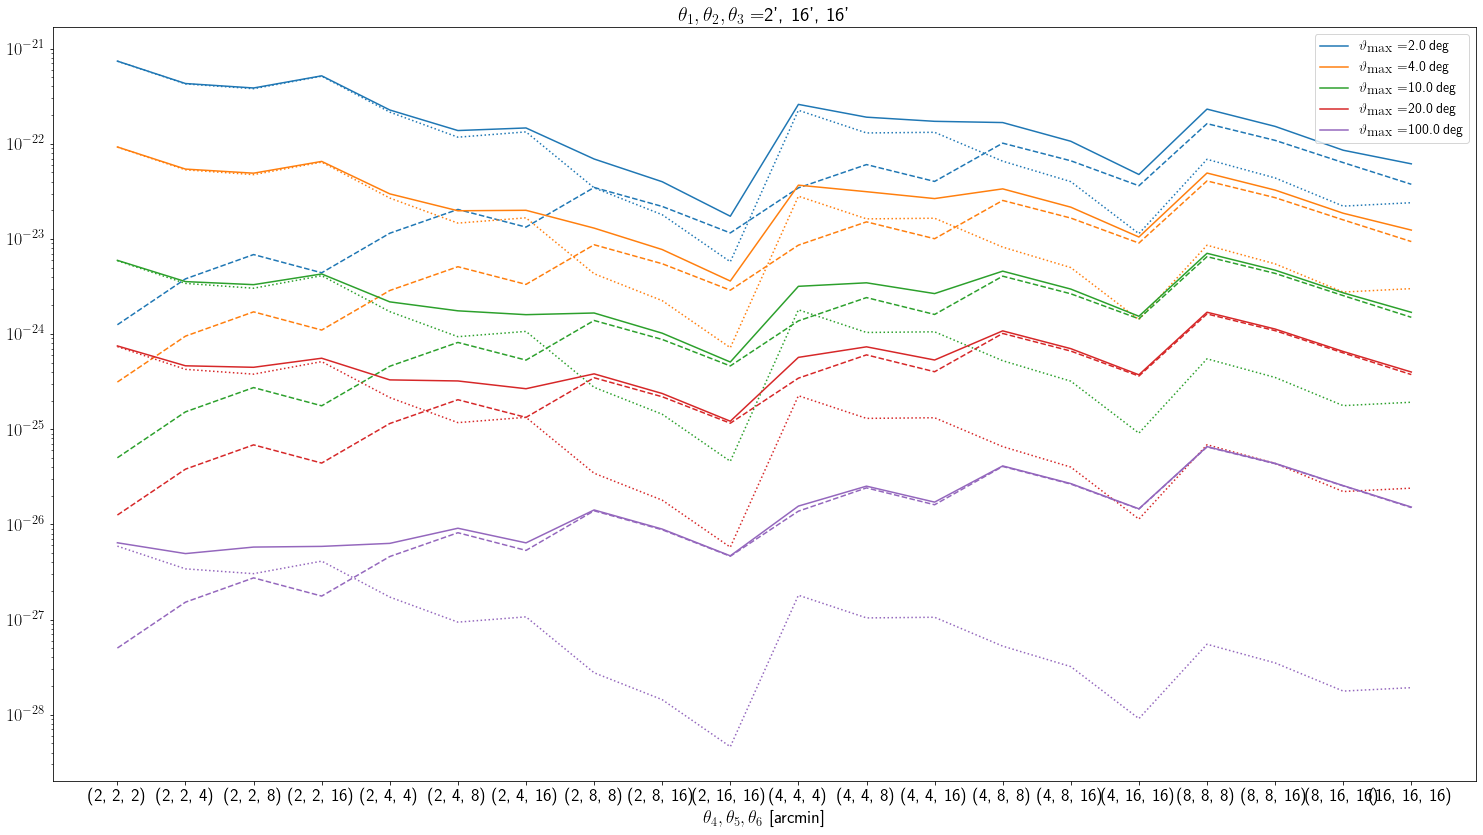

<Figure size 432x288 with 0 Axes>

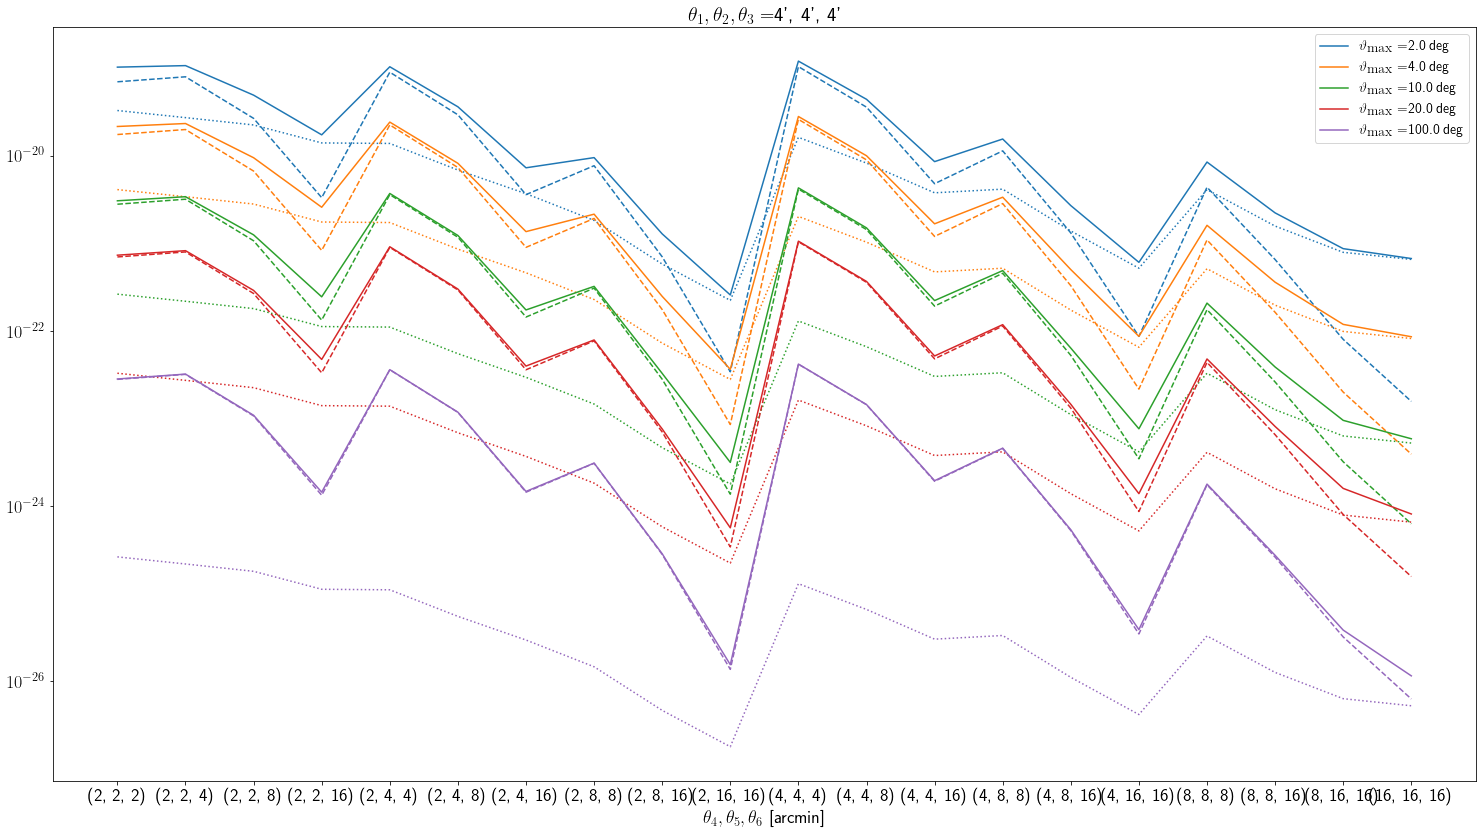

<Figure size 432x288 with 0 Axes>

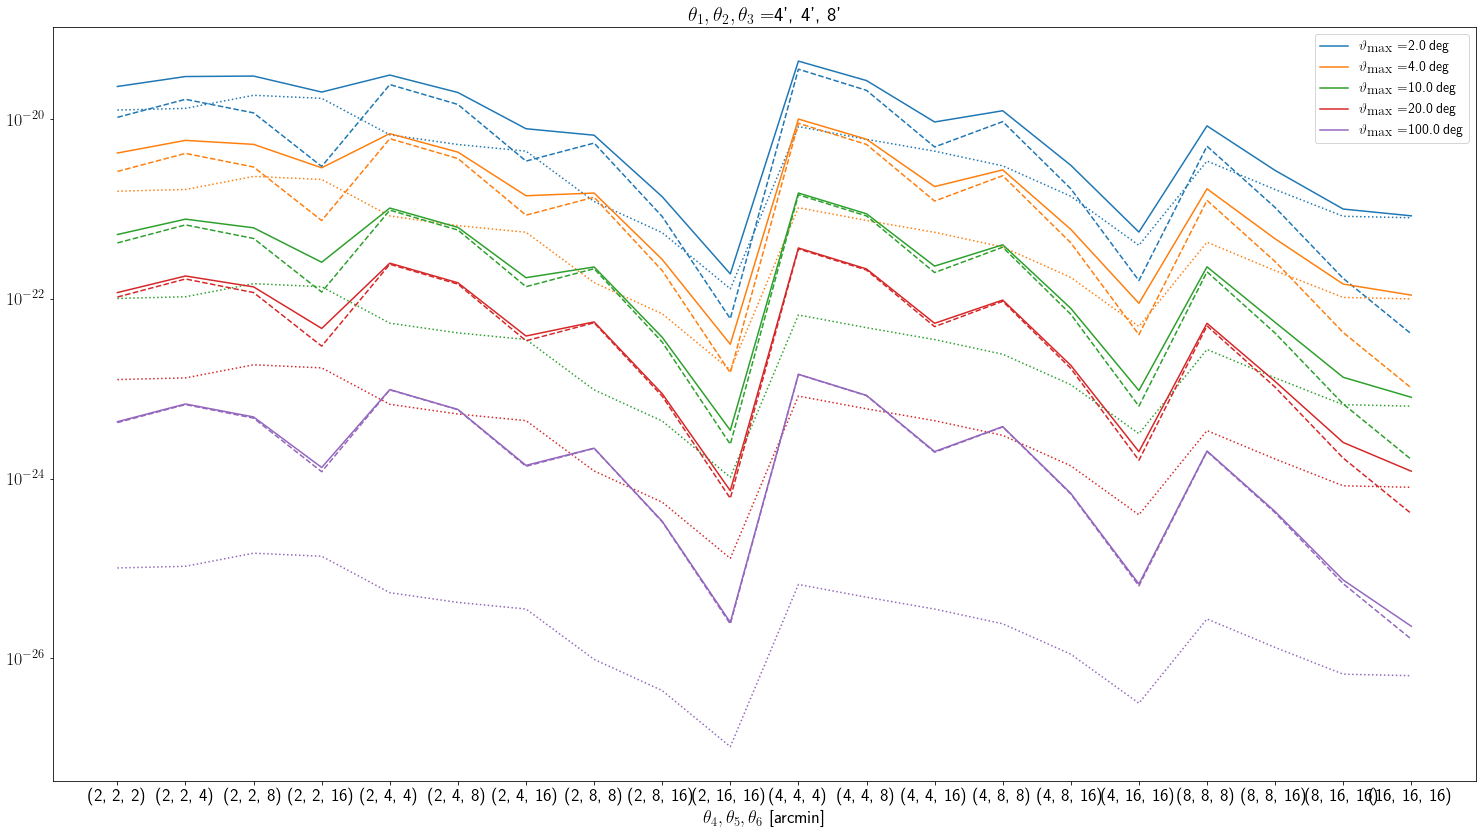

<Figure size 432x288 with 0 Axes>

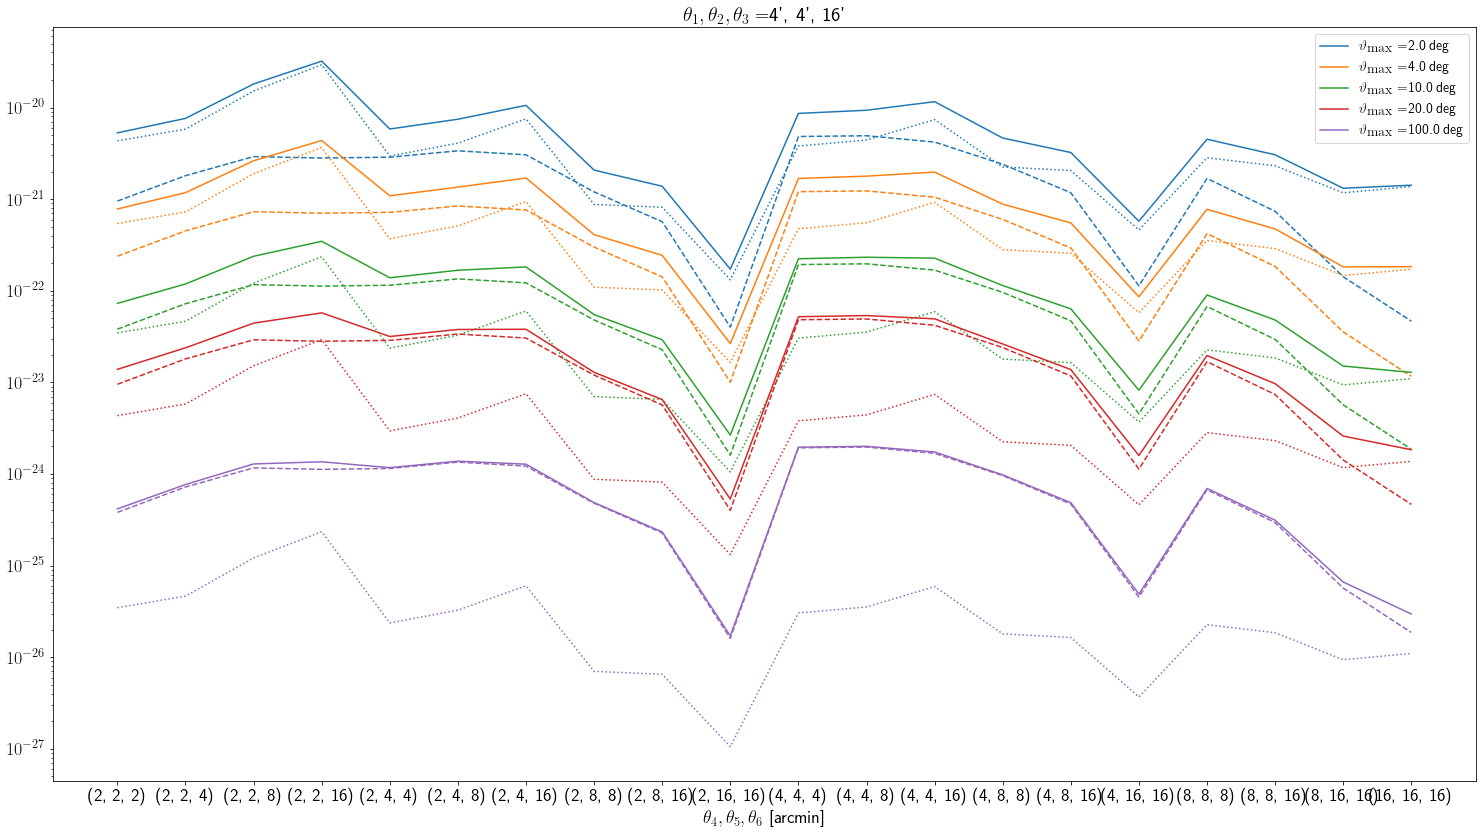

<Figure size 432x288 with 0 Axes>

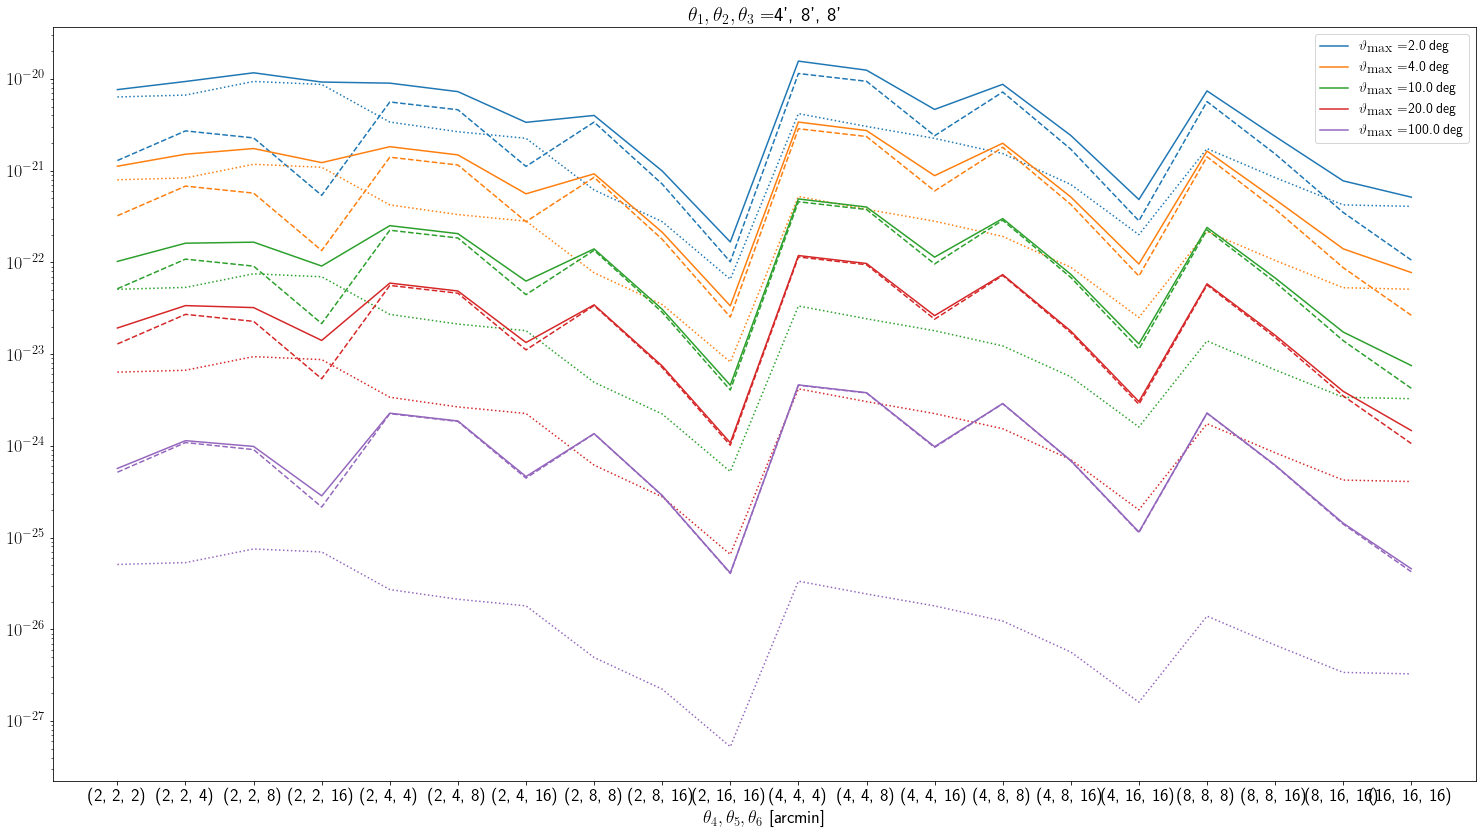

In [15]:
# Calculation for different survey areas
a_arr=np.array([2, 4, 10, 20, 100])
Na=len(a_arr)

sigma=0.3
neff=4096*4096/10/10

thetas_ind=np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                        [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8], 
                        [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8], 
                        [4, 4, 16], [4, 8, 8], [4, 8, 16], [4, 16, 16], 
                        [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16] ])


N=len(thetas_ind)

Term1=np.zeros((Na, N, N))
Term2=np.zeros((Na, N, N))
Joachimi=np.zeros((Na, N, N))

for i, a in enumerate(a_arr):
    covarianceCalculator = cov_constantPowerspectrum(sigma, neff, a*a, unit='deg')
    covarianceCalculatorFiniteField =cov_constantPowerspectrum_finiteField(sigma, neff, a*a, unit='deg')
    for j, thetas1 in enumerate(thetas_ind):
        for k, thetas2 in enumerate(thetas_ind):
            Term1[i,j,k]=covarianceCalculatorFiniteField.term1_total(thetas=np.array([thetas1[0],thetas1[1], thetas1[2], thetas2[0],thetas2[1], thetas2[2]]), unit="arcmin")
            Term2[i,j,k]=covarianceCalculatorFiniteField.term2_total(thetas=np.array([thetas1[0],thetas1[1], thetas1[2], thetas2[0],thetas2[1], thetas2[2]]), unit="arcmin")
            Joachimi[i,j,k]=covarianceCalculator.covariance(thetas=np.array([thetas1[0],thetas1[1], thetas1[2], thetas2[0],thetas2[1], thetas2[2]]), unit="arcmin")


# Plotting

thetas_labels=[]
for thetas in thetas_ind:
    thetas_labels.append(f"({thetas[0]}, {thetas[1]}, {thetas[2]})")


thetas_ticks=np.arange(0, N)
for i, thetas1 in enumerate(thetas_ind):
    plt.clf()
    fig, ax=plt.subplots(figsize=(21,12))
    ax.set_yscale('log')
    ax.set_xlabel(r'$\theta_4, \theta_5, \theta_6$ [arcmin]')
    ax.set_xticks(thetas_ticks)
    ax.set_xticklabels(thetas_labels)


    for j, a in enumerate(a_arr):
        color=next(ax._get_lines.prop_cycler)['color']
        ax.plot(Term2[j, i], ls=':', color=color)
        ax.plot(Joachimi[j, i], ls='--', color=color)
        ax.plot(Joachimi[j, i]+Term2[j, i], color=color, label=r"$\vartheta_\textrm{max}=$"+f"{a:.1f} deg")


    finalizePlot(ax, title=r'$\theta_1, \theta_2, \theta_3=$'+f"{thetas1[0]}', {thetas1[1]}', {thetas1[2]}'", outputFn=f"cov_{thetas1[0]}_{thetas1[1]}_{thetas1[2]}_differentAreas.png", loc_legend='upper right')